In [1]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

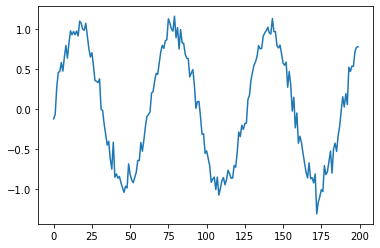

In [2]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200)*0.1 # 노이즈를 만들어 주기 위해 더해준다

plt.plot(series)
plt.show()

In [3]:
T = 10 # 10개의 타임시리즈
X = []
Y = []
for t in range(len(series) - T): # 0부터 10개 1부터 10개 ... 0부터 9까지 학습 10을 예측하는 방식으로 계속 누적
    x = series[t: t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [4]:
X = np.array(X).reshape(-1, T, 1) # N x T D 의 형태
Y = np.array(Y)
N = len(X)
print("X shape", X.shape, "Y shape", Y.shape) 

X shape (190, 10, 1) Y shape (190,)


## Create Model

In [5]:
# 95개 씩 잘라서 학습 시키고 나머지는 validation할 것

i = Input(shape=(T, 1))
x = SimpleRNN(5, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, 
          validation_data=(X[-N//2:], Y[-N//2:]))

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 3ms/sample - loss: 0.1840 - val_loss: 0.0711
Epoch 2/80
95/95 [==============================] - 0s 105us/sample - loss: 0.1243 - val_loss: 0.0798
Epoch 3/80
95/95 [==============================] - 0s 116us/sample - loss: 0.0643 - val_loss: 0.0921
Epoch 4/80
95/95 [==============================] - 0s 116us/sample - loss: 0.0720 - val_loss: 0.0345
Epoch 5/80
95/95 [==============================] - 0s 105us/sample - loss: 0.0329 - val_loss: 0.0589
Epoch 6/80
95/95 [==============================] - 0s 105us/sample - loss: 0.0516 - val_loss: 0.0413
Epoch 7/80
95/95 [==============================] - 0s 105us/sample - loss: 0.0288 - val_loss: 0.0414
Epoch 8/80
95/95 [==============================] - 0s 105us/sample - loss: 0.0410 - val_loss: 0.0349
Epoch 9/80
95/95 [==============================] - 0s 105us/sample - loss: 0.0298 - val_loss: 0.0394
Epoch 10/80
95/95 [=====================

95/95 [==============================] - 0s 105us/sample - loss: 0.0213 - val_loss: 0.0312


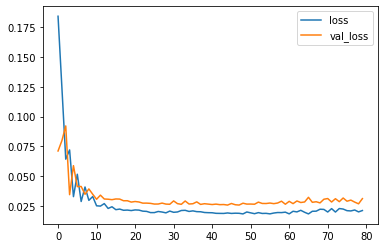

In [7]:
# matplotlib으로 정확도 확인하쟈
plt.plot(r.history['loss'], label='loss') # r이 가진 history 영역 중 빼오고 싶은 영역은 loss data... label은 loss로 지정
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [9]:
# 잘못된 예측 방법 ( with target)
# 검증을 해볼 건데 .... 타겟이라 하자
# total: 190 -> 190/2 = 95
validation_target = Y[-N//2:] # 95
validation_predictions = []   # 0

i = -N//2
while len(validation_predictions) < len(validation_target): # target보다 작을 때까지 반복
    p = model.predict(X[i].reshape(1, -1, 1))[0, 0] # 1x1 array -> scalar
    i += 1
    
    validation_predictions.append(p)

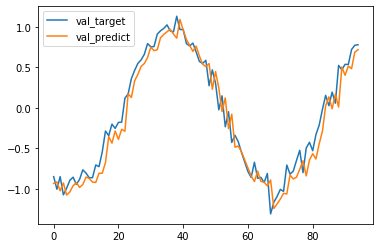

In [10]:
plt.plot(validation_target, label='val_target') 
plt.plot(validation_predictions, label='val_predict')
plt.legend()

# 아무튼 이건 잘못된거다
# 예측할 데이터와 학습할 데이터.... 잘못된 값을 가지고 쓰였다 ( X[i])

In [11]:
# 제대로 예측하는 방법 ( with predicted values)
# total: 190 -> 190/2 = 95
validation_target = Y[-N//2:] # 95
validation_predictions = []   # 0

last_x = X[-N//2] # 95, 1D array of T 이게 몬 소리지

i = -N//2
# X[i] == X[-N//2] == last_x
while len(validation_predictions) < len(validation_target): # target보다 작을 때까지 반복
    p = model.predict(last_x.reshape(1, -1, 1))[0, 0] # 1x1 array -> scalar
    
    validation_predictions.append(p)
    
    # update last_x
    
    last_x = np.roll(last_x, -1) # roll은 새로운 배열을 만드는데 한칸씩 이동하면서 배열을 만들겠다는 걸 지정
    # 1,2,3 -> 2,3,[] -> [] = p
    last_x[-1] = p

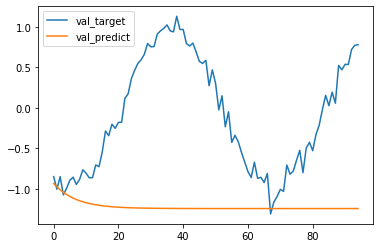

In [12]:
plt.plot(validation_target, label='val_target') 
plt.plot(validation_predictions, label='val_predict')
plt.legend()